In [96]:
from pandas import read_csv 
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [6]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [30]:
series = read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv',delimiter=";" ,header=0, parse_dates=[0], index_col=0)

In [31]:
series

,Sales
Month,
01-01,266.0
01-02,145.9
01-03,183.1
01-04,119.3
01-05,180.3
01-06,168.5
01-07,231.8
01-08,224.5
01-09,192.8


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

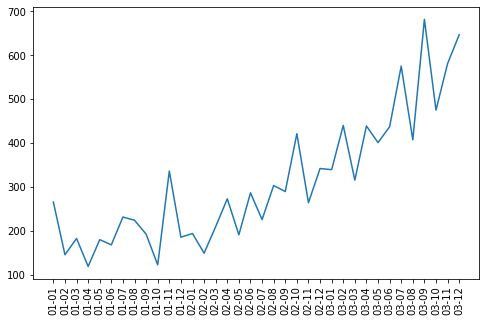

In [35]:
plt.figure(figsize=(8,5))
plt.plot(series)
plt.xticks(rotation=90)

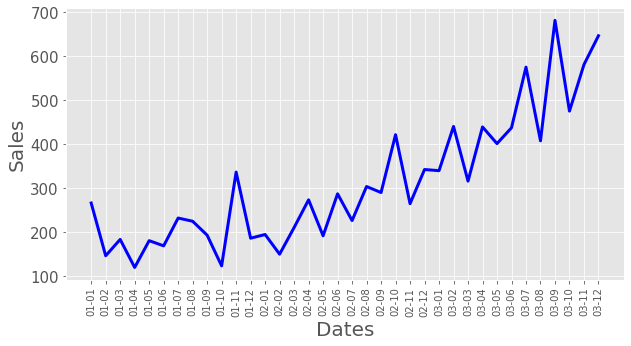

In [46]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 10)
plt.xticks(rotation=90)
plt.ylabel('Sales', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(series['Sales'], linewidth = 3, color = 'blue')
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Density'>

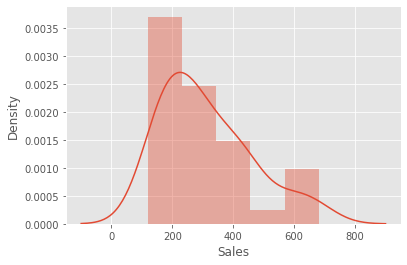

In [47]:
import seaborn as sns
sns.distplot(series['Sales'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

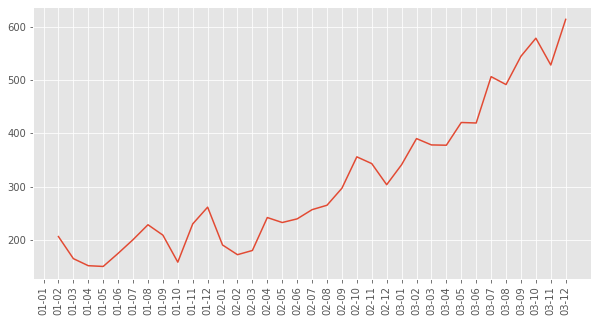

In [59]:
plt.figure(figsize=(10,5))
plt.plot(series['Sales'].rolling(2).mean())
plt.xticks(fontsize = 10)
plt.xticks(rotation=90)

In [ ]:
#so i will be taking rolling 2(window)

In [52]:
adfuller(series['Sales'] ,autolag='AIC')

(3.0601420836411815,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 278.9972644263031)

In [66]:
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(2).mean()
    rolstd=timeseries.rolling(2).std()
    plt.figure(figsize=(18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

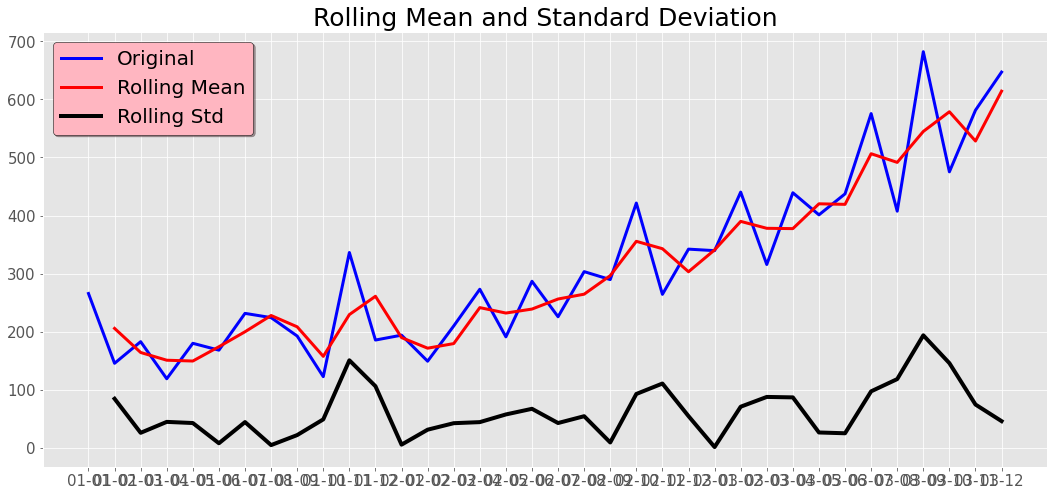

Results of dickey fuller test
Test Statistics                 3.060142
p-value                         1.000000
No. of lags used               10.000000
Number of observations used    25.000000
critical value (1%)            -3.723863
critical value (5%)            -2.986489
critical value (10%)           -2.632800
dtype: float64


In [67]:
test_stationarity(series['Sales'])

In [69]:
df_sales=series['Sales']
sales_diff1=df_sales.diff()
sales_diff1

Month
01-01      NaN
01-02   -120.1
01-03     37.2
01-04    -63.8
01-05     61.0
01-06    -11.8
01-07     63.3
01-08     -7.3
01-09    -31.7
01-10    -69.9
01-11    213.6
01-12   -150.6
02-01      8.4
02-02    -44.8
02-03     60.6
02-04     63.2
02-05    -81.9
02-06     95.6
02-07    -61.0
02-08     77.6
02-09    -13.7
02-10    131.7
02-11   -157.1
02-12     77.8
03-01     -2.6
03-02    100.7
03-03   -124.5
03-04    123.4
03-05    -38.0
03-06     36.1
03-07    138.1
03-08   -167.9
03-09    274.4
03-10   -206.7
03-11    106.0
03-12     65.6
Name: Sales, dtype: float64

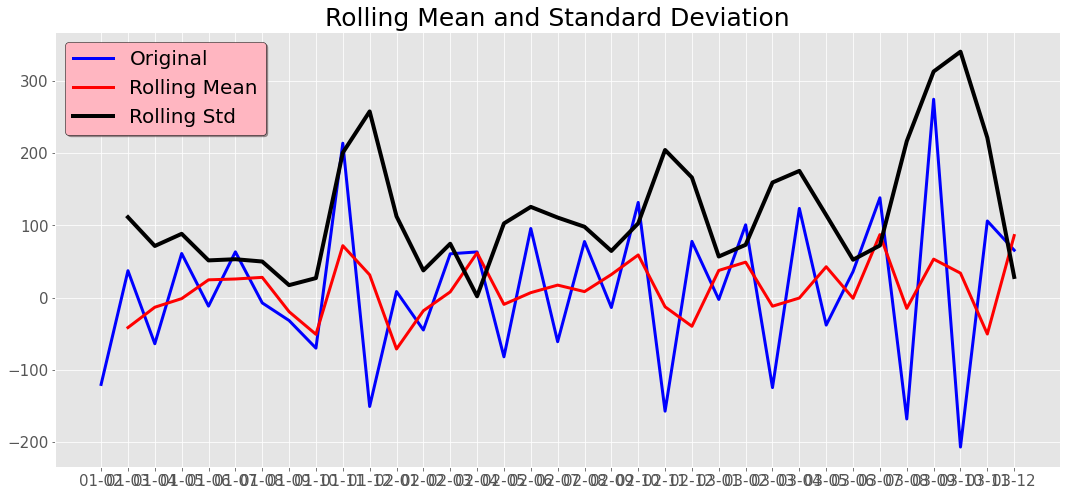

Results of dickey fuller test
Test Statistics               -7.249074e+00
p-value                        1.799857e-10
No. of lags used               1.000000e+00
Number of observations used    3.300000e+01
critical value (1%)           -3.646135e+00
critical value (5%)           -2.954127e+00
critical value (10%)          -2.615968e+00
dtype: float64


In [70]:
sales_diff1.dropna(inplace=True)
test_stationarity(sales_diff1)

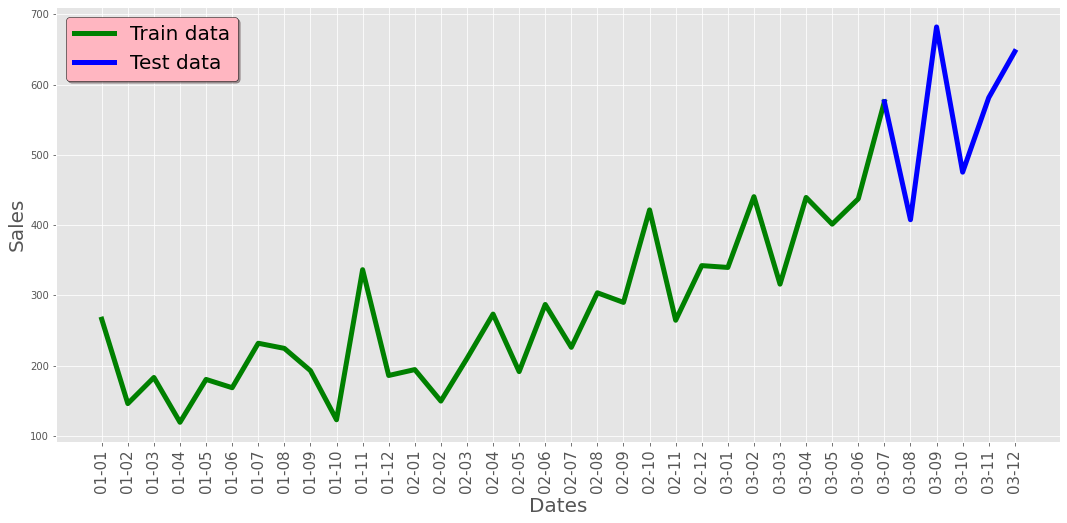

In [94]:
#split data into train and training set
train_data=df_sales[0:31]
test_data=df_sales[30:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(rotation=90)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

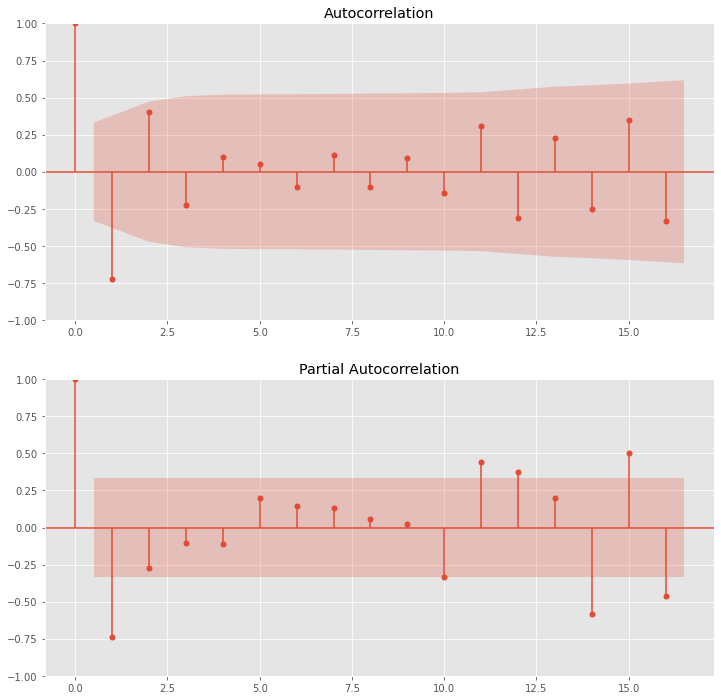

In [99]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)#function
fig = plot_acf(sales_diff1, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(sales_diff1, ax=ax2)

In [109]:
def evaluate_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [110]:
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [111]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train_data, test_data, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [112]:
arima_order=(1,0,1)

In [113]:
history = [x for x in train_data]

In [115]:
import statsmodels.api as sm

In [120]:
model = sm.tsa.arima.ARIMA(train_data, order=(0,1,0))
result = model.fit()

In [118]:
yhat = result.summary()
yhat     

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   31
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -169.887
Date:                Sat, 28 May 2022   AIC                            347.775
Time:                        22:56:23   BIC                            353.379
Sample:                             0   HQIC                           349.568
                                 - 31                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7402      0.332     -2.228      0.026      -1.391      -0.089
ma.L1         -0.0055      0.480     -0.011      0.991      -0.946       0.936
ma.L2         -0.1944      0.389     -0.499      0.618      -0.957       0.569
sigma2      4758.3923   1283.167      3.708      0.000    2243.431    7273.353
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.74   Prob(JB):                         0.51
Heteroskedasticity (H):               1.36   Skew:                             0.50
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.arima.ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    #fc, se, conf = model_fit.forecast(alpha = 0.05)
    predictions.append(yhat)
    obs=test_data[t]
    #conf_list.append(conf)
    history.append(obs)
    #print('predicted=%f, expexcted=%f' %(yhat,obs))
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))


RMSE of ARIMA Model: 164.18994082058333


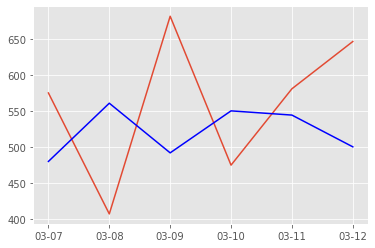

In [145]:
pyplot.plot(test_data)
pyplot.plot(predictions,color='blue')
pyplot.show()